### **TUGAS 6**
### **NAUFAL ALIF ANARGYA-2311110041-SD0401**

#### **1. Menghapus kolom target, melakukan EDA, dan Preprocessing**

Ringkasan Data:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Nilai Hilang:
sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64


<Figure size 1000x800 with 0 Axes>

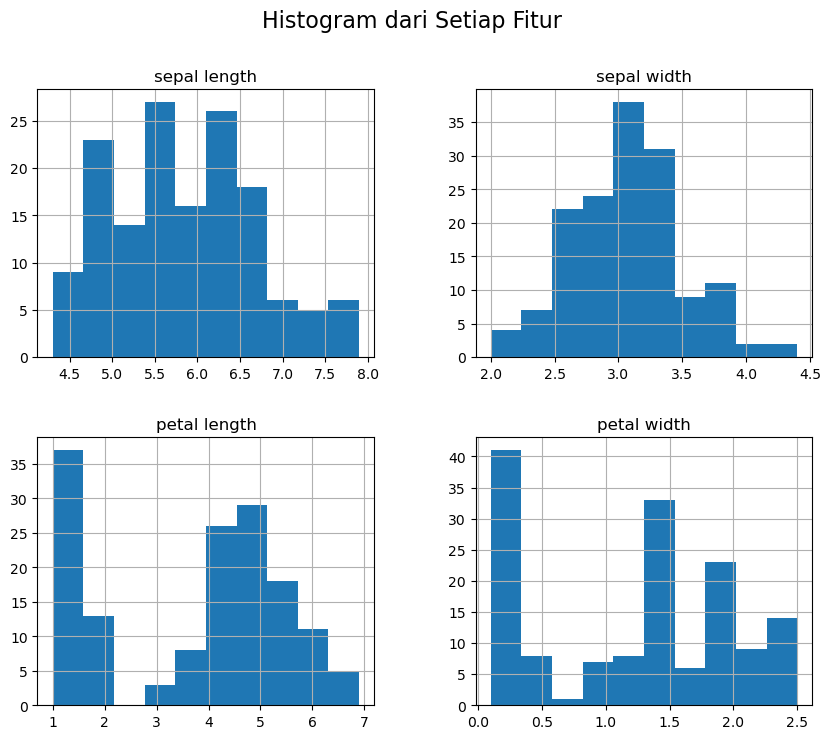

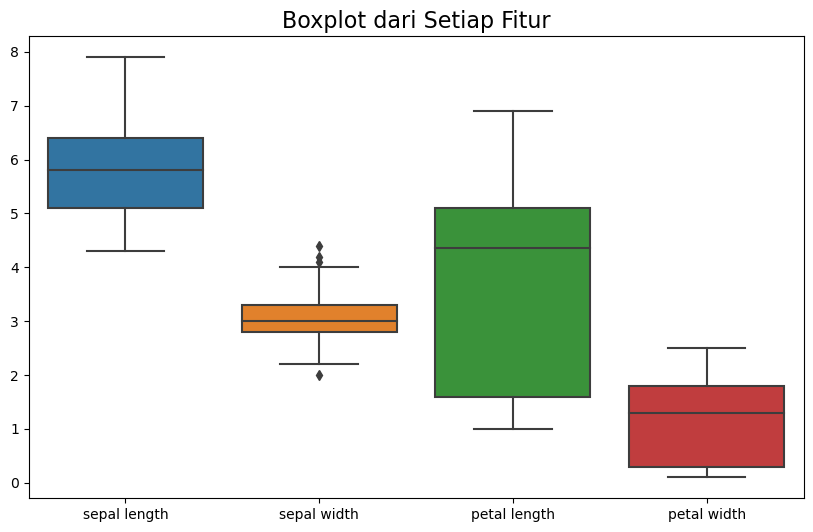

c:\Users\HP VICTUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


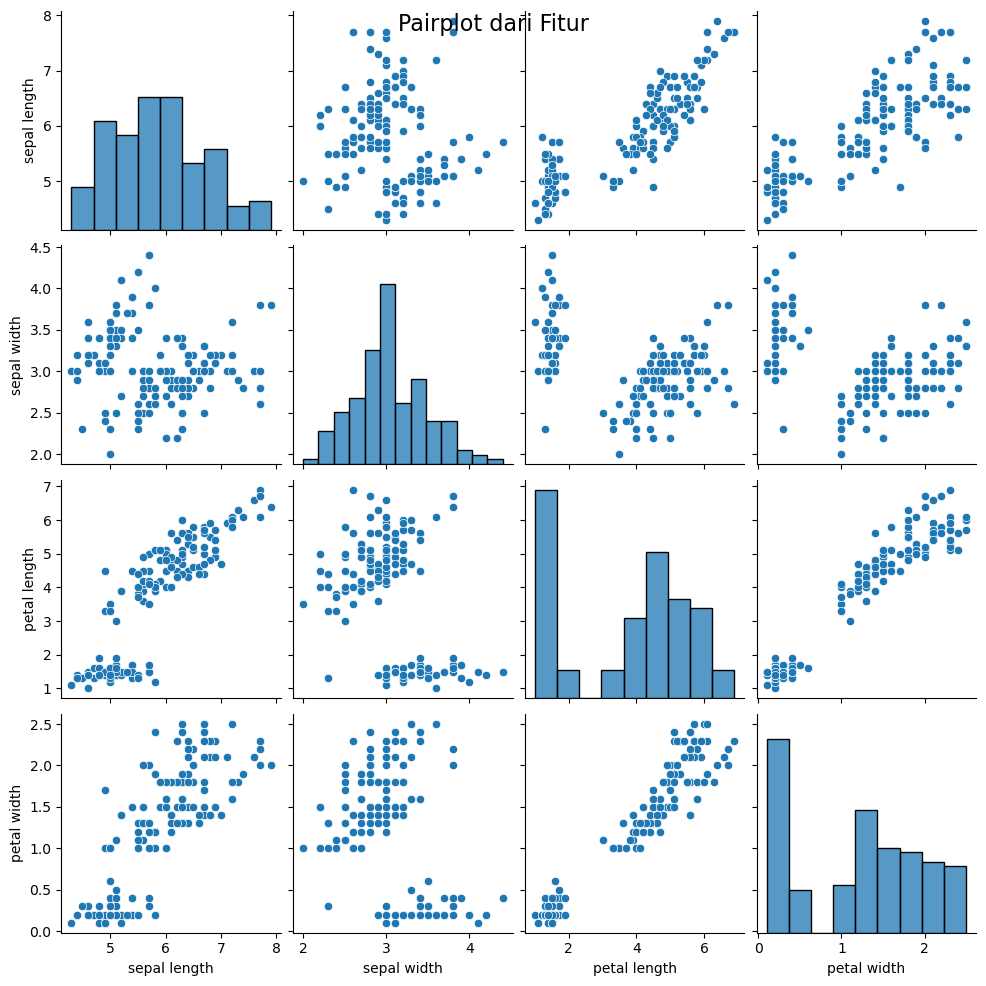


Data Pelatihan:
[[-1.50652052  1.26346019 -1.56873522 -1.31297673]
 [-0.17367395  3.11468391 -1.2844067  -1.05003079]
 [ 1.03800476  0.10644536  0.36469871  0.26469891]
 [-1.26418478  0.80065426 -1.227541   -1.31297673]
 [-1.74885626  0.33784833 -1.39813811 -1.31297673]]

Data Pengujian:
[[ 3.10997534e-01 -5.87763531e-01  5.35295827e-01  1.75297293e-03]
 [-1.73673948e-01  1.72626612e+00 -1.17067529e+00 -1.18150376e+00]
 [ 2.24968346e+00 -1.05056946e+00  1.78634131e+00  1.44795564e+00]
 [ 1.89829664e-01 -3.56360566e-01  4.21564419e-01  3.96171883e-01]
 [ 1.15917263e+00 -5.87763531e-01  5.92161531e-01  2.64698913e-01]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('Dataset-Tugas.csv')

data = data.drop(columns=['class'])

print("Ringkasan Data:")
print(data.describe())

print("\nNilai Hilang:")
print(data.isnull().sum())

plt.figure(figsize=(10, 8))
data.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histogram dari Setiap Fitur', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot dari Setiap Fitur', fontsize=16)
plt.show()

sns.pairplot(data)
plt.suptitle('Pairplot dari Fitur', fontsize=16)
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

print("\nData Pelatihan:")
print(X_train[:5])  
print("\nData Pengujian:")
print(X_test[:5])   

### **Interpretasi**
##### **1. Statistik Deskriptif**
- **Jumlah Data**: 150 untuk setiap fitur; tidak ada nilai yang hilang.
- **Rata-rata**:
  - Sepal Length: 5.84 cm
  - Sepal Width: 3.05 cm
  - Petal Length: 3.76 cm
  - Petal Width: 1.20 cm
- **Standar Deviasi**:
  - Sepal Length: 0.83 cm
  - Sepal Width: 0.43 cm
  - Petal Length: 1.76 cm
  - Petal Width: 0.76 cm
- **Rentang Nilai**:
  - Sepal Length: 4.3 – 7.9 cm
  - Sepal Width: 2.0 – 4.4 cm
  - Petal Length: 1.0 – 6.9 cm
  - Petal Width: 0.1 – 2.5 cm

##### **2. Distribusi Data (Histogram)**
- **Sepal Length**: Distribusi sedikit bimodal; sebagian besar data berada di rentang 5.0 – 6.5 cm.
- **Sepal Width**: Distribusi unimodal, puncak di sekitar 3.0 cm; sedikit miring ke kanan.
- **Petal Length**: Distribusi bimodal; dua puncak sekitar 1.5 cm dan 4.5 cm, menunjukkan dua kelompok data.
- **Petal Width**: Distribusi unimodal dengan puncak sekitar 1.5 cm.

##### **3. Analisis Outlier (Boxplot)**
- **Sepal Length, Petal Length, dan Petal Width**: Tidak ada outlier terdeteksi.
- **Sepal Width**: Terdapat outlier pada sekitar 2 cm dan 4.5 cm.
- **Rentang**:
  - Sepal Width memiliki distribusi lebih kompak dibandingkan fitur lainnya.

##### **4. Hubungan Antar Fitur (Pairplot & Korelasi)**
- **Korelasi Positif**:
  - Sepal Length dan Petal Length.
  - Petal Length dan Petal Width (keduanya cukup kuat).
- **Korelasi Negatif**:
  - Sepal Width dan Petal Length menunjukkan korelasi negatif lemah.
- **Distribusi**:
  - Fitur seperti Sepal Length dan Petal Length mendekati distribusi normal.
- **Outlier**:
  - Outlier terlihat pada scatterplot fitur tertentu.

##### **5. Preprocessing (Normalisasi)**
- Data telah dinormalisasi menjadi rata-rata 0 dan deviasi standar 1.
- Contoh data setelah normalisasi menunjukkan bagaimana data terdistribusi relatif terhadap mean.

##### **Kesimpulan**
Dataset ini bersih dari nilai kosong, memiliki distribusi yang menarik (beberapa bimodal), dan menunjukkan hubungan korelasi yang relevan antara fitur. Dataset ini siap untuk analisis lebih lanjut atau pengembangan model machine learning. 

### **2. K-MEANS**

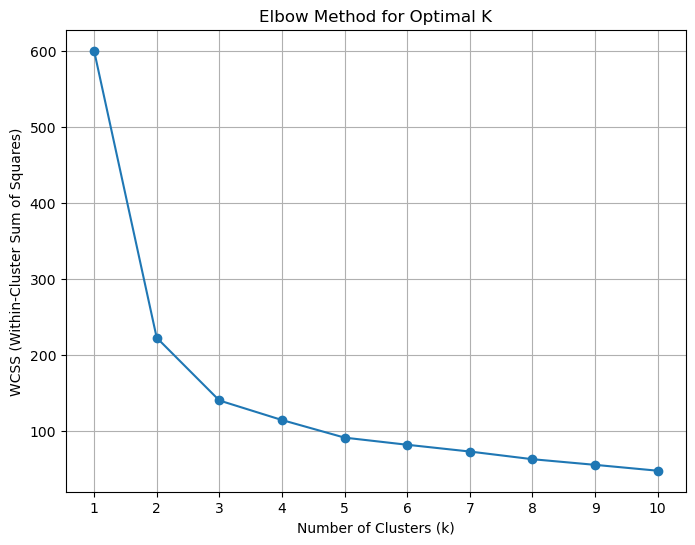

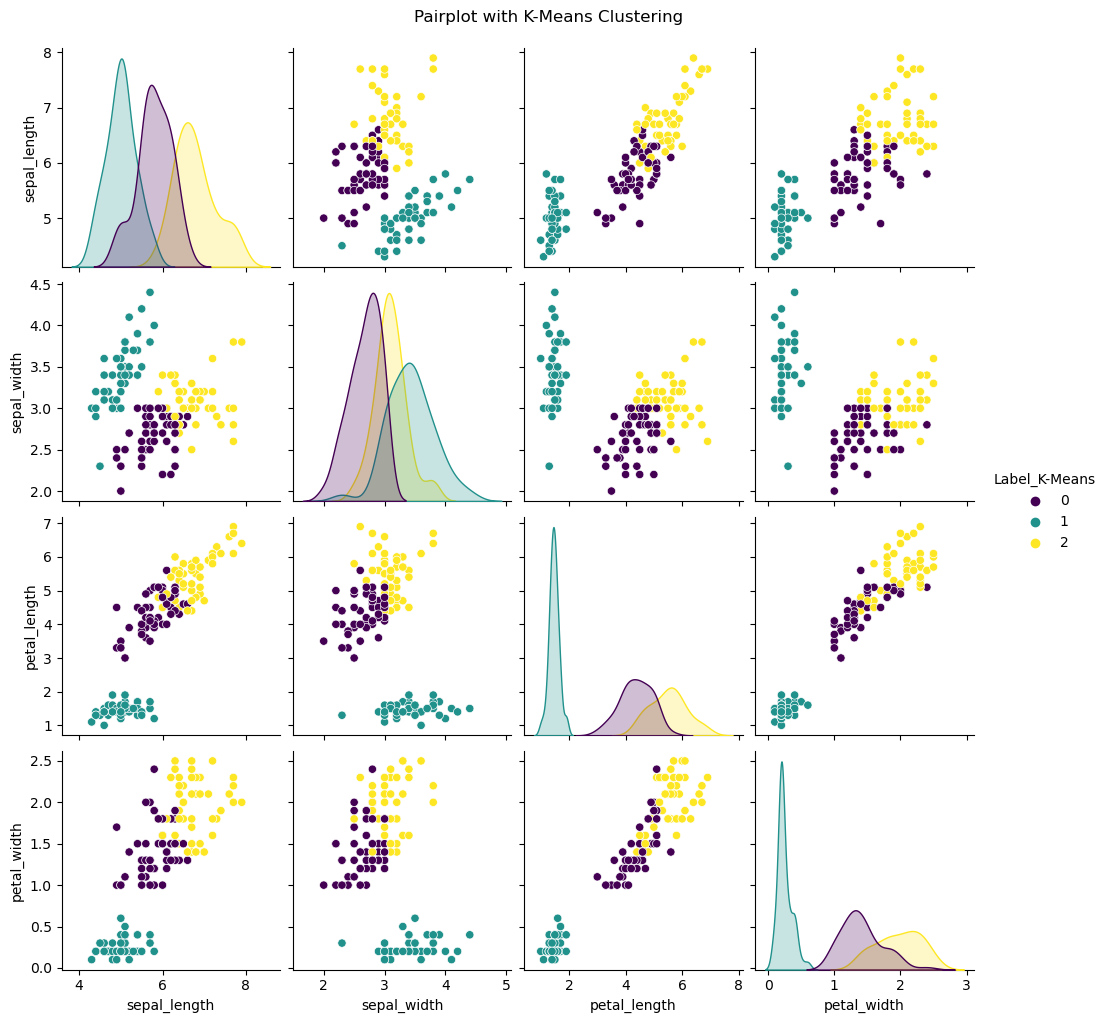

Dataset with K-Means labels saved as 'Iris_with_Labels.csv'.


In [ ]:
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

os.environ["OMP_NUM_THREADS"] = "1"

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

iris = sns.load_dataset('iris')

iris_data = iris.drop(columns='species')

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)  
iris['Label_K-Means'] = kmeans_final.fit_predict(iris_scaled)

sns.pairplot(iris, hue='Label_K-Means', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot with K-Means Clustering', y=1.02)
plt.show()

iris.to_csv('Iris_with_Labels.csv', index=False)
print("Dataset with K-Means labels saved as 'Iris_with_Labels.csv'.")


### **3. DB-SCAN**

Unique DBSCAN labels: [ 0 -1  1]


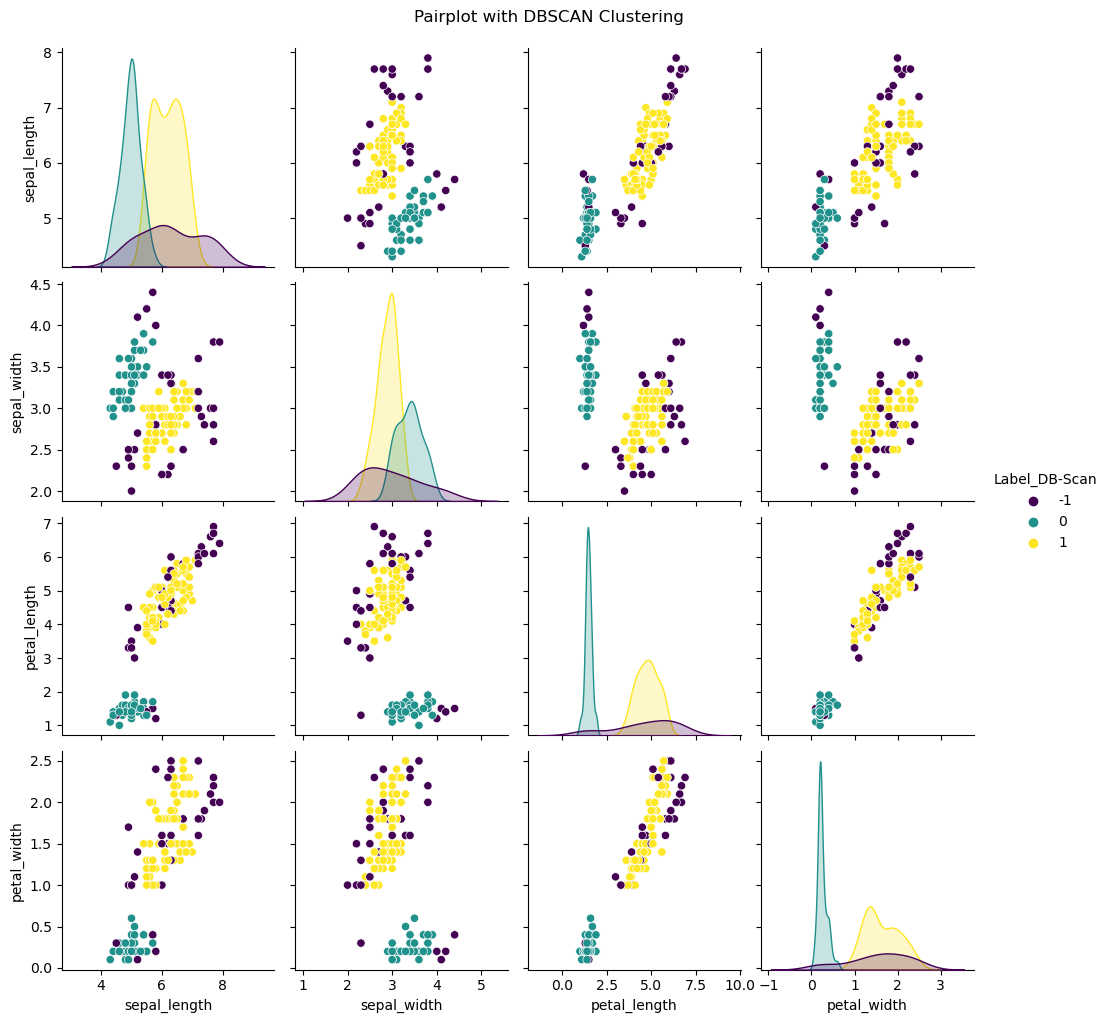

Dataset with DBSCAN labels saved as 'Iris_with_DBSCAN_Labels.csv'.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

iris_data = iris.drop(columns='species')

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

dbscan = DBSCAN(eps=0.5, min_samples=5)  
iris['Label_DB-Scan'] = dbscan.fit_predict(iris_scaled)

unique_labels = iris['Label_DB-Scan'].unique()
print(f"Unique DBSCAN labels: {unique_labels}")

sns.pairplot(iris, hue='Label_DB-Scan', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot with DBSCAN Clustering', y=1.02)
plt.show()

iris.to_csv('Iris_with_DBSCAN_Labels.csv', index=False)
print("Dataset with DBSCAN labels saved as 'Iris_with_DBSCAN_Labels.csv'.")


### **4. Plot DB-SCAN dan K-MEANS**

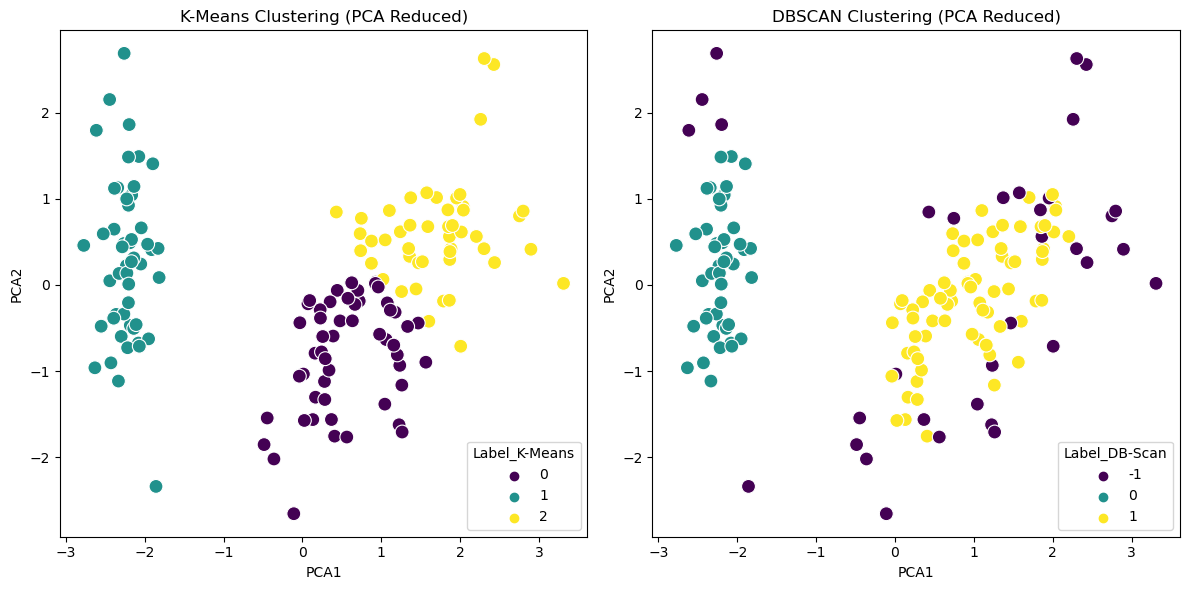

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

iris_data = iris.drop(columns='species')
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
iris['Label_K-Means'] = kmeans.fit_predict(iris_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
iris['Label_DB-Scan'] = dbscan.fit_predict(iris_scaled)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
iris['PCA1'] = iris_pca[:, 0]
iris['PCA2'] = iris_pca[:, 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Label_K-Means', data=iris,
    palette='viridis', s=100
)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Label_DB-Scan', data=iris,
    palette='viridis', s=100
)
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()


### **Interpretasi**
Hasil plot menunjukkan perbedaan yang signifikan antara algoritma K-Means dan DBSCAN dalam mengelompokkan data. Pada plot K-Means, data dikelompokkan menjadi tiga cluster yang ditandai dengan warna ungu, hijau, dan kuning. Algoritma ini menghasilkan cluster yang simetris dengan batas yang jelas, karena bekerja berdasarkan jarak Euclidean. Namun, K-Means tidak mendeteksi noise atau outlier, sehingga semua data akan dimasukkan ke dalam salah satu cluster. Algoritma ini cocok digunakan untuk data yang memiliki distribusi reguler dan berbentuk bulat atau elips, meskipun beberapa data di perbatasan cluster mungkin kurang sesuai dengan hasil prediksi.

Sementara itu, plot DBSCAN menunjukkan dua cluster utama yang ditandai dengan warna hijau dan kuning, serta sejumlah data yang dianggap sebagai noise (ditandai dengan warna ungu dan diberi label `-1`). DBSCAN bekerja dengan mengidentifikasi densitas data sehingga mampu mendeteksi outlier secara otomatis dan menghasilkan cluster dengan bentuk yang tidak harus simetris atau reguler. Algoritma ini lebih fleksibel untuk menangani dataset dengan distribusi yang kompleks, namun hasilnya sangat bergantung pada parameter `eps` (radius) dan `min_samples` (jumlah data minimum dalam radius `eps`). Jika parameter tidak diatur dengan baik, beberapa data mungkin keliru dianggap sebagai noise atau cluster dapat terbagi tidak merata.

Secara keseluruhan, K-Means lebih cocok untuk dataset tanpa banyak noise dan dengan distribusi yang teratur, sedangkan DBSCAN lebih sesuai untuk data dengan bentuk cluster yang tidak beraturan dan banyak outlier. Pilihan algoritma tergantung pada karakteristik dataset serta tujuan analisis yang ingin dicapai.

### **5. Silhouette score dan Davies-Bouldin Index**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

X = iris.drop(columns='species')  
X_scaled = StandardScaler().fit_transform(X)  

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)

print(f"Silhouette Score K-Means: {silhouette_kmeans:.3f}")
print(f"Davies-Bouldin Index K-Means: {davies_bouldin_kmeans:.3f}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.3f}")
print(f"Davies-Bouldin Index DBSCAN: {davies_bouldin_dbscan:.3f}")


Silhouette Score K-Means: 0.460
Davies-Bouldin Index K-Means: 0.834
Silhouette Score DBSCAN: 0.357
Davies-Bouldin Index DBSCAN: 7.124


### **Interpretasi** 
### **1. Silhouette Score:**
Silhouette Score mengukur seberapa baik titik data di dalam klaster dibandingkan dengan titik di klaster lain. Nilai yang lebih tinggi menunjukkan klaster yang lebih baik, lebih terpisah dan lebih terdefinisi dengan baik.

- **K-Means** memiliki Silhouette Score **0.460**, yang menunjukkan bahwa model ini mampu menghasilkan klaster yang terpisah dengan cukup baik, meskipun masih bisa diperbaiki.
- **DBSCAN** memiliki Silhouette Score **0.357**, yang lebih rendah dari K-Means, menunjukkan bahwa klaster yang dihasilkan oleh DBSCAN kurang terpisah dengan baik atau ada sebagian titik data yang tidak masuk dalam klaster, karena DBSCAN juga mengklaster beberapa data sebagai "noise" (dengan label `-1`).

### **2. Davies-Bouldin Index:**
Davies-Bouldin Index (DBI) mengukur sejauh mana klaster terpisah dan seberapa rapat klaster-klaster tersebut. Semakin kecil nilai DBI, semakin baik pembagian klaster.

- **K-Means** memiliki nilai **0.834**, yang menunjukkan bahwa klaster-klaster yang dihasilkan cukup terpisah dengan baik, dengan tingkat kompak yang relatif baik.
- **DBSCAN**, dengan nilai DBI yang sangat tinggi **7.124**, menunjukkan bahwa klaster yang dihasilkan sangat buruk dalam hal pemisahan dan kompak. Nilai yang tinggi ini mengindikasikan bahwa DBSCAN mungkin menghasilkan klaster yang kurang terpisah dan lebih tersebar, atau banyak data yang tidak bisa dikelompokkan dengan baik (dengan label `-1` sebagai noise).

### **Kesimpulan Evaluasi:**
Berdasarkan kedua metrik evaluasi ini, **K-Means** menunjukkan performa yang lebih baik daripada **DBSCAN** pada dataset ini:

- **Silhouette Score** lebih tinggi pada K-Means, menunjukkan klaster yang lebih terpisah dan lebih terdefinisi.
- **Davies-Bouldin Index** lebih rendah pada K-Means, menunjukkan pemisahan klaster yang lebih baik dan lebih kompak.

Dengan demikian, **K-Means** adalah model dengan nilai evaluasi terbaik berdasarkan hasil yang diberikan. DBSCAN mungkin tidak bekerja dengan baik pada dataset ini, mungkin karena data terlalu padat atau terlalu terpisah sehingga DBSCAN kesulitan membentuk klaster yang jelas.